<a href="https://colab.research.google.com/github/guptaShourya/Credit_Card_Fraud_Detection/blob/main/fraudDetectionEXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
from google.colab import drive
drive.mount('/content/drive')
!pip install dataprep
sns.set()

Mounted at /content/drive
     |████████████████████████████████| 1.8 MB 7.5 MB/s 
     |████████████████████████████████| 848 kB 63.7 MB/s 
     |████████████████████████████████| 366 kB 75.2 MB/s 
     |████████████████████████████████| 1.5 MB 70.4 MB/s 
     |████████████████████████████████| 63 kB 2.8 MB/s 
     |████████████████████████████████| 1.3 MB 71.1 MB/s 
     |████████████████████████████████| 719 kB 44.8 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 10.1 MB 52.6 MB/s 
     |████████████████████████████████| 294 kB 60.1 MB/s 
     |████████████████████████████████| 142 kB 53.5 MB/s 
     |████████████████████████████████| 118 kB 59.1 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 743 kB 74.1 MB/s 
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13919 sha256=56a3cd471009c4ca109f518bab1236da162cad9f85a98c3db7d1ccd5a09b8b39
  Stored in di

In [2]:
path = '/content/drive/My Drive/ML sem-5/fraud detection/data.csv'
# import data
data = pd.read_csv(path)

In [3]:
# display top 10 rows of data
data.head(10)

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0
5   2.0 -0.425966  0.960523  1.141109  ...  0.253844  0.081080    3.67      0
6   4.0  1.229658  0.141004  0.045371  ...  0.034507  0.005168    4.99      0
7   7.0 -0.644269  1.417964  1.074380  ... -1.206921 -1.085339   40.80      0
8   7.0 -0.894286  0.286157 -0.113192  ...  0.011747  0.142404   93.20      0
9   9.0 -0.338262  1.119593  1.044367  ...  0.246219  0.083076    3.68      0

[10 rows x 31 columns]

In [4]:
# number of rows and columns in dataset
print("Data has {} rows, {} columns".format(data.shape[0], data.shape[1]))

Data has 284807 rows, 31 columns


In [5]:
#number of nulls in dataset
print("Data has {} null values".format(data.isnull().any().sum()))

Data has 0 null values


In [6]:
# overview of statistics of data
data.describe()

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

In [30]:
from sklearn import model_selection #train, test split

y = data['Class'] #target variable
X = data.drop('Class', axis = 1) #predictors
# split data into train (80%) and test(20%) set
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [31]:
from sklearn.preprocessing import StandardScaler #standardisation

scaler = StandardScaler() #scaler processor

Xtrain_scaled = scaler.fit_transform(Xtrain) #Standardize features by removing the mean and scaling to unit variance
Xtest_scaled = scaler.transform(Xtest)

In [32]:
from dataprep.eda import create_report #EDA report
Xtrain_scaledDF = pd.DataFrame(Xtrain_scaled, columns=Xtrain.columns)
report = create_report(Xtrain_scaledDF)

DataPrep Report
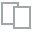
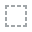
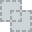
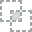
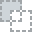
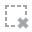
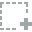
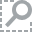
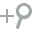
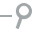
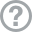
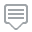
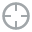
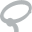
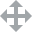
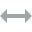
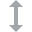
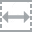
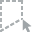
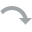
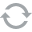
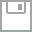
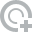
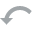
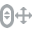
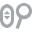
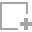
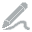
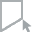
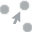
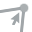
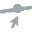

In [10]:
from IPython.core.display import display #for visualising report

display(report)


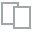
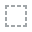
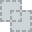
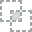
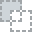
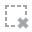
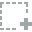
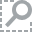
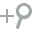
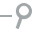
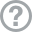
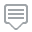
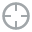
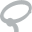
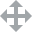
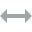
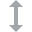
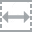
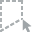
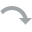
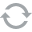
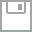
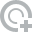
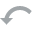
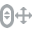
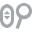
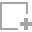
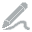
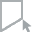
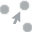
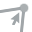
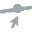

In [11]:
from dataprep.eda import plot #distribution plot

plot(Ytrain) #distribution of target variable


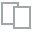
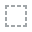
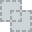
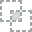
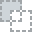
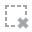
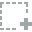
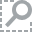
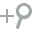
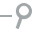
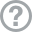
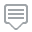
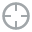
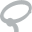
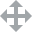
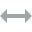
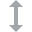
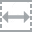
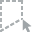
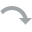
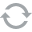
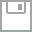
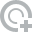
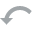
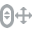
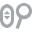
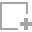
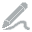
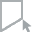
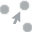
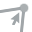
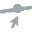

In [12]:
from dataprep.eda import plot_correlation #plot correlation b/w 2 variables

Xtrain_scaledDF1 = Xtrain_scaledDF.copy() #copy of Xtrain_scaled dataframe
Xtrain_scaledDF1['y'] = Ytrain.values #append column y of target variable values

plot_correlation(Xtrain_scaledDF1, 'y') #display correlation plot b/w predictors and target

In [33]:
from imblearn.over_sampling import SMOTE #to over sample minority class (target = 1)
from imblearn.under_sampling import RandomUnderSampler #to under sample majority class (target = 0)

#oversample considering 5 nearest neighbours such that |target=1|/|target=0| = 3/7
smote = SMOTE(sampling_strategy = 3/7, k_neighbors = 5, random_state = 9)
under = RandomUnderSampler(sampling_strategy = 0.5, random_state = 9) #undersample such that |target=1|/|target=0| = 0.5

Xtrain_scaled, Ytrain = smote.fit_resample(Xtrain_scaled, Ytrain) #apply oversampling
Xtrain_scaled, Ytrain = under.fit_resample(Xtrain_scaled, Ytrain) #apply undersampling

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [34]:
print('Class \tDistribution\n1\t', len(Ytrain[Ytrain==1])/len(Ytrain), '% \n0\t', len(Ytrain[Ytrain==0])/len(Ytrain), '%')

Class 	Distribution
1	 0.3333333333333333 % 
0	 0.6666666666666666 %


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
params = {'C' : [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5]}
clf = GridSearchCV(LogisticRegression(), params)
clf.fit(Xtrain_scaled, Ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005,
                               0.01, 0.03, 0.05, 0.1, 0.3, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
(clf.score(Xtest_scaled, Ytest))

0.9906604402935291

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

In [ ]:
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)